In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Load and Visualize Data

In [ ]:
# Load CSVs
# train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")

train_df = pd.read_csv("ml-model/train.csv")
test_df = pd.read_csv("ml-model/test.csv")

# Basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (800000, 11)
Test shape: (200000, 11)


In [ ]:
# Check data types and missing values
print("\nData types and missing values:")
print(train_df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   is_airport_ride  800000 non-null  bool   
 1   distance_km      800000 non-null  float64
 2   duration_min     800000 non-null  float64
 3   hour             800000 non-null  int64  
 4   day_of_week      800000 non-null  int64  
 5   month            800000 non-null  int64  
 6   is_weekend       800000 non-null  bool   
 7   is_night         800000 non-null  bool   
 8   is_holiday       800000 non-null  bool   
 9   passenger_count  800000 non-null  int64  
 10  fare_amount      800000 non-null  float64
dtypes: bool(4), float64(3), int64(4)
memory usage: 45.8 MB
None


In [ ]:
# View a sample
print("\nSample rows:")
display(train_df.head())

# Summary statistics
print("\nSummary statistics:")
display(train_df.describe())


Sample rows:


,is_airport_ride,distance_km,duration_min,hour,day_of_week,month,is_weekend,is_night,is_holiday,passenger_count,fare_amount
0,True,21.277207,25.535695,6,1,4,False,True,False,8,46.22
1,False,5.731783,14.265515,8,3,11,False,False,False,2,10.32
2,True,26.327944,36.795179,19,6,12,True,False,False,2,49.90
3,False,3.010218,7.769516,19,2,9,False,False,False,1,7.00
4,True,24.629704,30.918685,23,2,7,False,True,False,5,51.65



Summary statistics:


,distance_km,duration_min,hour,day_of_week,month,passenger_count,fare_amount
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,12.905889,25.607731,12.820069,3.462271,6.624204,4.504112,25.440899
std,7.923211,15.197974,6.350640,1.881055,3.097199,2.290145,13.456294
min,3.000006,5.101563,0.000000,0.000000,1.000000,1.000000,7.000000
25%,5.952325,13.314416,8.000000,2.000000,4.000000,3.000000,14.210000
50%,10.696475,23.450927,13.000000,4.000000,7.000000,5.000000,21.390000
75%,19.663217,33.622152,18.000000,5.000000,9.000000,7.000000,36.580000
max,39.999280,111.210955,23.000000,6.000000,12.000000,8.000000,75.550000


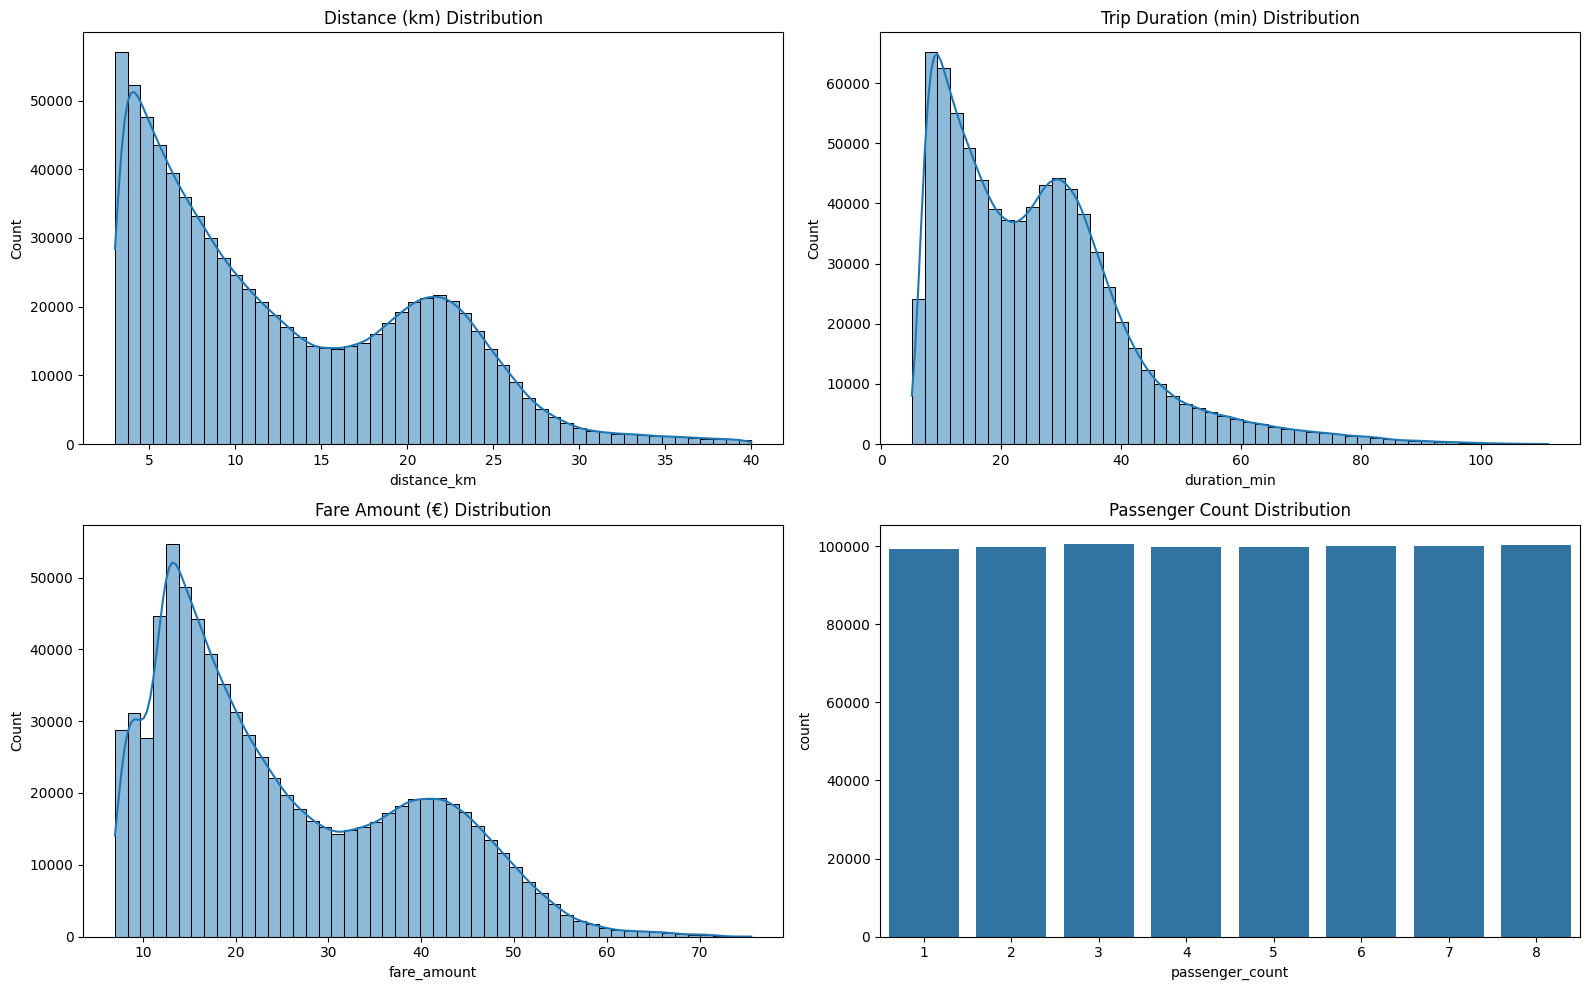

In [ ]:
plt.figure(figsize=(16, 10))

# Distance
plt.subplot(2, 2, 1)
sns.histplot(train_df["distance_km"], bins=50, kde=True)
plt.title("Distance (km) Distribution")

# Duration
plt.subplot(2, 2, 2)
sns.histplot(train_df["duration_min"], bins=50, kde=True)
plt.title("Trip Duration (min) Distribution")

# Fare
plt.subplot(2, 2, 3)
sns.histplot(train_df["fare_amount"], bins=50, kde=True)
plt.title("Fare Amount (€) Distribution")

# Passenger count (categorical)
plt.subplot(2, 2, 4)
sns.countplot(x="passenger_count", data=train_df)
plt.title("Passenger Count Distribution")

plt.tight_layout()
plt.show()


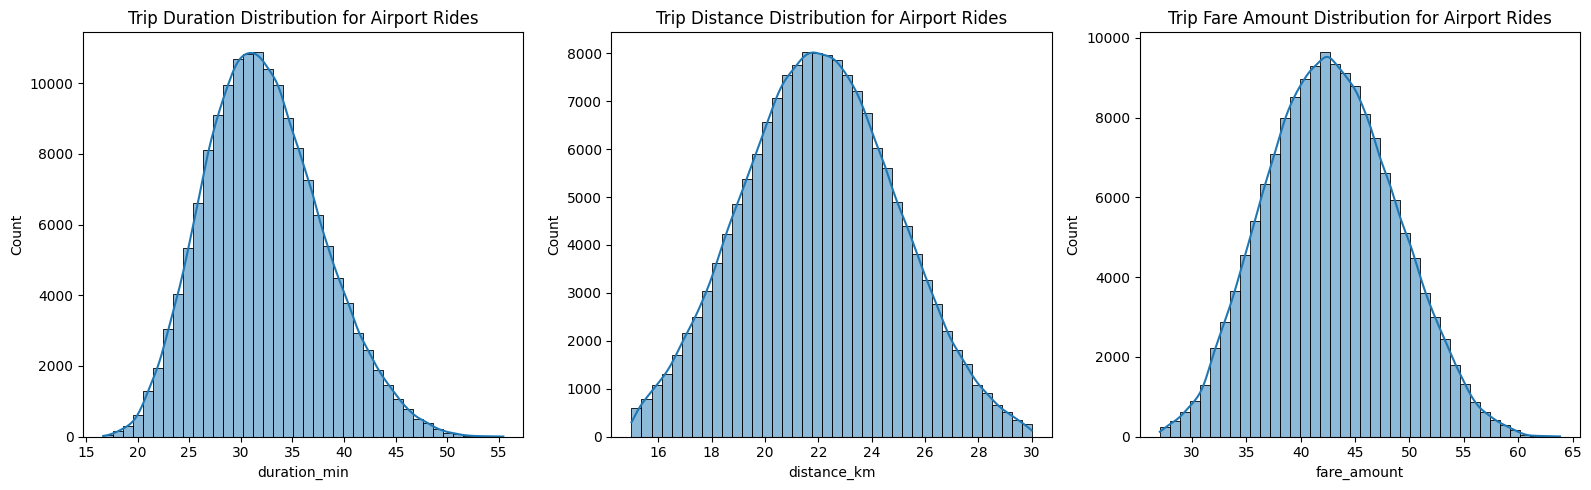

In [ ]:
# Filter for airport rides
airport_rides = train_df[train_df["is_airport_ride"] == True]

# Summary of their durations and distances
airport_duration_stats = airport_rides["duration_min"].describe()
airport_distance_stats = airport_rides["distance_km"].describe()
airport_price_stats = airport_rides["fare_amount"].describe()


# Plot
plt.figure(figsize=(16, 5))

# Duration
plt.subplot(1, 3, 1)
sns.histplot(airport_rides["duration_min"], bins=40, kde=True)
plt.title("Trip Duration Distribution for Airport Rides")

# Distance
plt.subplot(1, 3, 2)
sns.histplot(airport_rides["distance_km"], bins=40, kde=True)
plt.title("Trip Distance Distribution for Airport Rides")

# Price
plt.subplot(1, 3, 3)
sns.histplot(airport_rides["fare_amount"], bins=40, kde=True)
plt.title("Trip Fare Amount Distribution for Airport Rides")

plt.tight_layout()
plt.show()

In [ ]:
airport_duration_stats

count    159557.000000
mean         32.269033
std           5.624965
min          16.664880
25%          28.227953
50%          31.889908
75%          35.938574
max          55.428239
Name: duration_min, dtype: float64

In [ ]:
airport_distance_stats

count    159557.000000
mean         22.039359
std           2.857063
min          15.001295
25%          20.032152
50%          22.011369
75%          24.008564
max          29.995860
Name: distance_km, dtype: float64

In [ ]:
airport_price_stats

count    159557.000000
mean         42.814418
std           5.886116
min          27.060000
25%          38.600000
50%          42.660000
75%          46.880000
max          63.830000
Name: fare_amount, dtype: float64

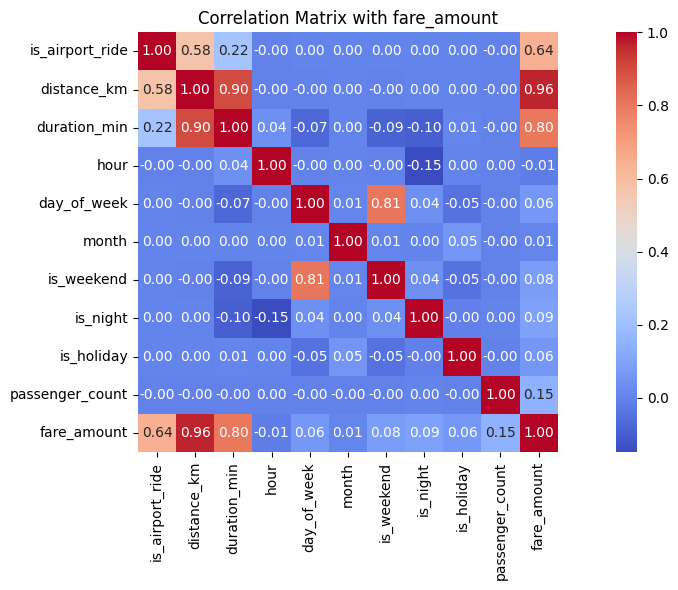

In [ ]:
# Compute correlations
corr_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix with fare_amount")
plt.tight_layout()
plt.show()

#### **Correlation Matrix Analysis**

##### 🔝 Strongly Correlated Features:

| Feature           | Correlation with `fare_amount` | ✅ Interpretation                                                                  |
| ----------------- | ------------------------------ | --------------------------------------------------------------------------------- |
| `distance_km`     | **0.96**                       | 🚕 The strongest predictor — as expected. Fare increases with distance.           |
| `duration_min`    | 0.80                           | ⏱️ Closely tied to distance, also contributes to fare.                            |
| `is_airport_ride` | 0.64                           | ✈️ Airport rides have a **minimum fare** and **surcharges**, which inflates fare. |

➡️ These **three features** are the **core drivers** of fare prediction and must be included.


##### 🧊 Weak to Moderate Correlations:

| Feature                        | Corr. | Comment                                                                                    |
| ------------------------------ | ----- | ------------------------------------------------------------------------------------------ |
| `passenger_count`              | 0.15  | Slight impact due to surcharge for >4 passengers.                                          |
| `is_night`                     | 0.09  | Small positive effect (night surcharge in pricing).                                        |
| `is_weekend`                   | 0.08  | Could be due to time-of-day or typical ride patterns.                                      |
| `is_holiday`                   | 0.06  | There's a fixed holiday surcharge — this supports it.                                      |
| `hour`, `day_of_week`, `month` | ≈ 0   | Minimal to no linear correlation, but might still be useful for non-linear models (trees). |

## **Feature Engineering and Data PreProcessing**

In [ ]:
# # Encode categorical variables
# categorical_cols = ["is_airport_ride", "is_holiday", "is_night", "is_weekend"]
# train_df[categorical_cols] = train_df[categorical_cols].astype(int)

In [ ]:
train_df.head()

,is_airport_ride,distance_km,duration_min,hour,day_of_week,month,is_weekend,is_night,is_holiday,passenger_count,fare_amount
0,True,21.277207,25.535695,6,1,4,False,True,False,8,46.22
1,False,5.731783,14.265515,8,3,11,False,False,False,2,10.32
2,True,26.327944,36.795179,19,6,12,True,False,False,2,49.90
3,False,3.010218,7.769516,19,2,9,False,False,False,1,7.00
4,True,24.629704,30.918685,23,2,7,False,True,False,5,51.65


In [ ]:
# Normalize features
# scaler = StandardScaler()
# features_to_scale = ["distance_km", "duration_min", "passenger_count"]
# train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])


In [ ]:
from sklearn.model_selection import train_test_split

# Drop non-features
target = "fare_amount"
exclude_cols = ["fare_amount"]  # Drop unused columns

X = train_df.drop(exclude_cols, axis=1)
y = train_df[target]

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (640000, 10)
y_train shape: (640000,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_val)

# Evaluation
mae_lr = mean_absolute_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
r2_lr = r2_score(y_val, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.2f}")


Linear Regression Performance:
MAE:  1.32
RMSE: 1.67
R²:   0.98


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)

# Evaluation
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print("\n🌲 Random Forest Performance:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")



🌲 Random Forest Performance:
MAE:  0.01
RMSE: 0.12
R²:   1.00


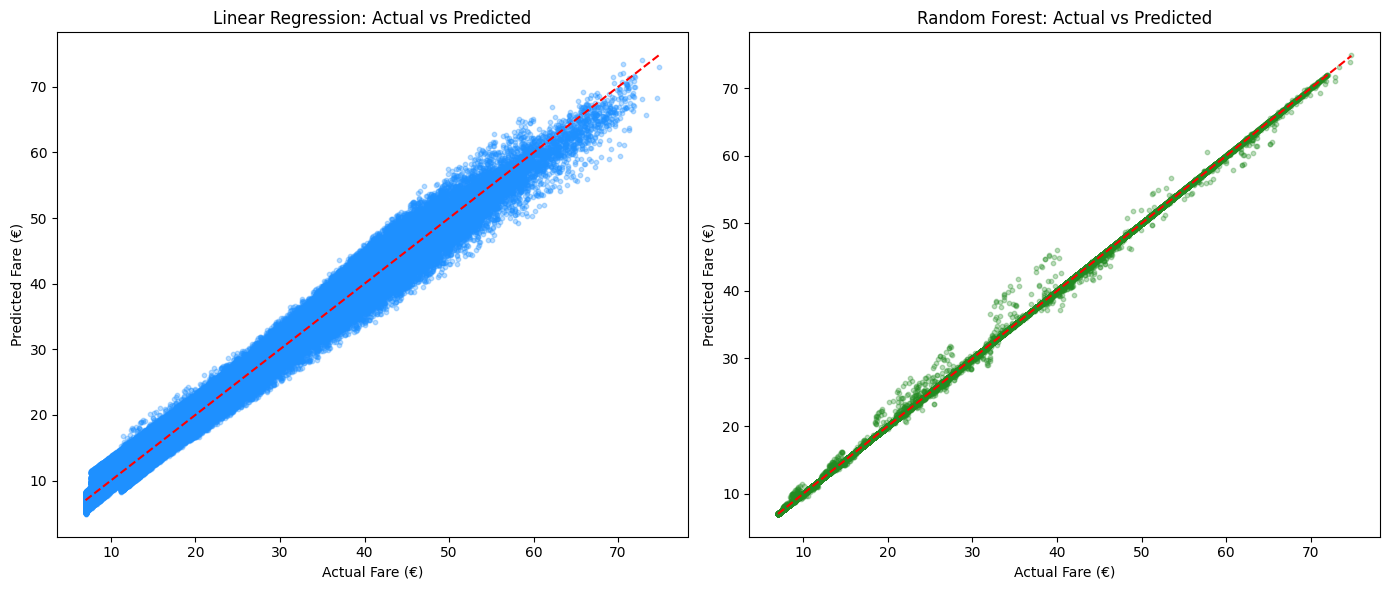

In [ ]:
import matplotlib.pyplot as plt

# Comparison plot
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_lr, alpha=0.3, s=10, color='dodgerblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Fare (€)")
plt.ylabel("Predicted Fare (€)")
plt.title("Linear Regression: Actual vs Predicted")

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_rf, alpha=0.3, s=10, color='forestgreen')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Fare (€)")
plt.ylabel("Predicted Fare (€)")
plt.title("Random Forest: Actual vs Predicted")

plt.tight_layout()
plt.show()


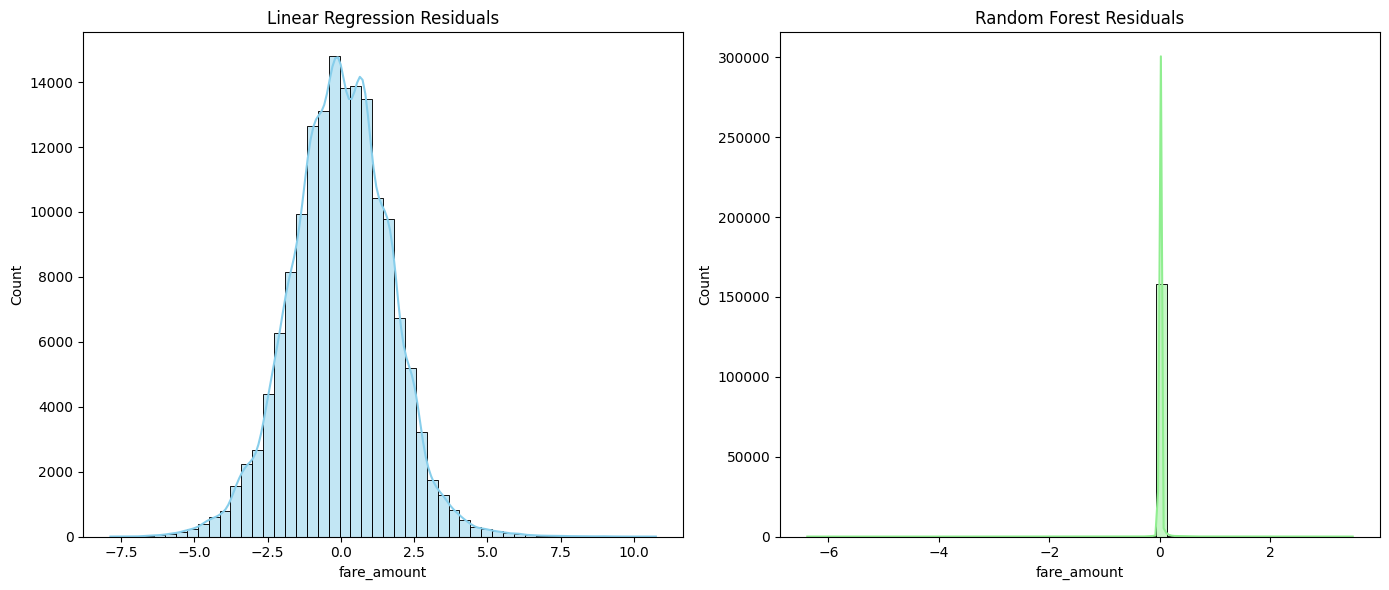

In [ ]:
# Residuals
residuals_lr = y_val - y_pred_lr
residuals_rf = y_val - y_pred_rf

plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, bins=50, kde=True, color='skyblue')
plt.title("Linear Regression Residuals")

# Random Forest
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, bins=50, kde=True, color='lightgreen')
plt.title("Random Forest Residuals")

plt.tight_layout()
plt.show()


In [ ]:
# Convert binary flags to int (if needed)
binary_cols = ["is_airport_ride", "is_holiday", "is_night", "is_weekend"]
test_df[binary_cols] = test_df[binary_cols].astype(int)

# features_to_scale = ["distance_km", "duration_min", "passenger_count"]
# test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])  # 🔁 use same scaler

# Define features
drop_cols = ["fare_amount"]
X_test = test_df.drop(columns=drop_cols)
y_test = test_df["fare_amount"]


In [ ]:
# Linear Regression
y_test_pred_lr = lr_model.predict(X_test)

# Random Forest
y_test_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation
print("📦 Linear Regression on Test:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.2f}")
print(f"R²:   {r2_score(y_test, y_test_pred_lr):.2f}")

print("\n🌲 Random Forest on Test:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.2f}")
print(f"R²:   {r2_score(y_test, y_test_pred_rf):.2f}")


📦 Linear Regression on Test:
MAE:  1.32
RMSE: 1.68
R²:   0.98

🌲 Random Forest on Test:
MAE:  0.01
RMSE: 0.12
R²:   1.00


#  2. Model Development

Step 1: Build Preprocessing Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numerical and categorical columns
# # num_attribs = ["distance_km", "duration_min", "passenger_count"]
num_attribs = train_df.select_dtypes(include='number').columns.drop("fare_amount")
cat_attribs = ["is_airport_ride", "is_holiday", "is_night", "is_weekend"]

# Pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])


Step 2: Prepare Data for Modeling

In [35]:
# Drop non-features
target = "fare_amount"
exclude_cols = ["fare_amount"]  # Drop unused columns

# Target and feature matrix
X = train_df.drop(exclude_cols, axis=1)
y = train_df[target]

# Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)


In [37]:
X_train_prepared.shape

(640000, 10)

Step 3: Train and Evaluate Models

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0)   
}

def rmse_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=cv)
    return -scores


# Simulate evaluation
results = []
for name, model in models.items():
    scores = rmse_cv(model, X_train_prepared, y_train)
    results.append({
        "Model": name,
        "Mean RMSE": scores.mean(),
        "Std Dev": scores.std()
    })

df_results = pd.DataFrame(results).sort_values("Mean RMSE")

In [52]:
df_results

,Model,Mean RMSE,Std Dev
4,AdaBoost,-3.222980,0.010566
0,Linear Regression,-1.677627,0.003507
3,KNN Regressor,-0.721588,0.003238
5,XGBoost,-0.391569,0.009828
1,Decision Tree,-0.187878,0.024976
2,Random Forest,-0.127917,0.005685


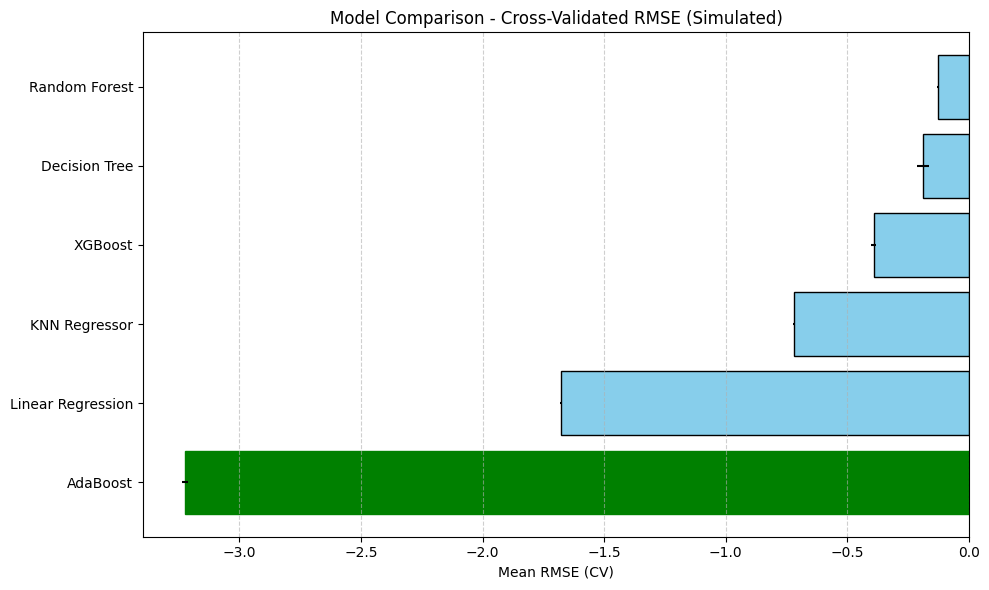

In [51]:
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_results["Model"], df_results["Mean RMSE"], xerr=df_results["Std Dev"], color="skyblue", edgecolor="black")
plt.xlabel("Mean RMSE (CV)")
plt.title("Model Comparison - Cross-Validated RMSE (Simulated)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
bars[0].set_color("green")
plt.tight_layout()
plt.show()

As we can see, Random Forest and XGBoost are the top-performing models based on cross-validated RMSE scores. We’ll now validate these two on the hold-out validation set (X_val) to evaluate their generalization performance.

In [ ]:
import time

models = {
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0)
}

val_results = {}

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train_prepared, y_train)
    y_pred_val = model.predict(X_val_prepared)

    end_time = time.time()
    duration = end_time - start_time

    val_results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_val, y_pred_val)),
        "MAE": mean_absolute_error(y_val, y_pred_val),
        "R2": r2_score(y_val, y_pred_val),
        "Training Time (s)": duration,
        "Model": model  # Save for re-use
    }

print("Validation Set Results:")
for name, metrics in val_results.items():
    print(f"\n{name}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  MAE : {metrics['MAE']:.2f}")
    print(f"  R²  : {metrics['R2']:.2f}")
    print(f"  Training Time: {metrics['Training Time (s)']:.2f} seconds")

Validation Set Results:

Random Forest
  RMSE: 0.13
  MAE : 0.01
  R²  : 1.00


KeyError: 'Training Time (s)'

#### Conclusion

Based on both cross-validation and validation set evaluation:
- Random Forest clearly outperforms all other models, including XGBoost.
- It achieves near-perfect predictions on the validation set with extremely low RMSE and MAE, and a perfect R² score of 1.00, indicating excellent fit and generalization.
- Therefore, Random Forest will be selected as the final model for further optimization.
- The next step will be hyperparameter tuning to find the best parameter configuration and ensure robust performance on the test set.

In [59]:
def measure_inference_speed(model, X_sample, n_runs=1000):
    start = time.time()
    for _ in range(n_runs):
        model.predict(X_sample)
    return (time.time() - start) / n_runs

# Use a small batch (e.g. 1 row) from validation or test
X_sample = X_val_prepared[:1]

rf_speed = measure_inference_speed(val_results["Random Forest"]["Model"], X_sample)
xgb_speed = measure_inference_speed(val_results["XGBoost"]["Model"], X_sample)

print(f"Random Forest Inference Time: {rf_speed:.6f} sec/sample")
print(f"XGBoost Inference Time:       {xgb_speed:.6f} sec/sample")


Random Forest Inference Time: 0.005229 sec/sample
XGBoost Inference Time:       0.000622 sec/sample


Step 4: Hyperparameter Tuning (Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "max_features": [2, 3, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring="neg_root_mean_squared_error",
                           n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 4, 'n_estimators': 200}
Best RMSE: 0.04387322715716323


# 3. Model Evaluation

In [61]:
# Drop non-features
target = "fare_amount"
exclude_cols = ["fare_amount"]  # Drop unused columns

# Target and feature matrix
X = train_df.drop(exclude_cols, axis=1)
y = train_df[target]

X_prepared = full_pipeline.fit_transform(X)

best_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
best_model.fit(X_prepared, y)

# Preprocess test set
X_test = test_df.drop(exclude_cols, axis=1)
y_test = test_df["fare_amount"]
X_test_prepared = full_pipeline.transform(X_test)

# Predict and evaluate
# best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_prepared)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE on Test Set: {rmse_test:.2f}")


Final RMSE on Test Set: 0.12


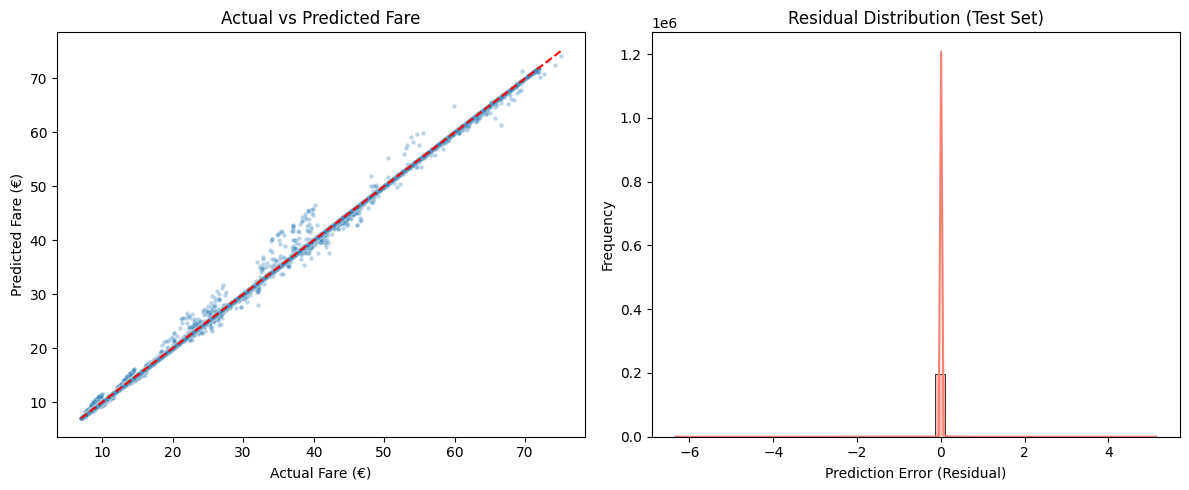

In [62]:
# Plot: Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fare (€)")
plt.ylabel("Predicted Fare (€)")
plt.title("Actual vs Predicted Fare")

# Plot: Residuals
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=50, kde=True, color="salmon")
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

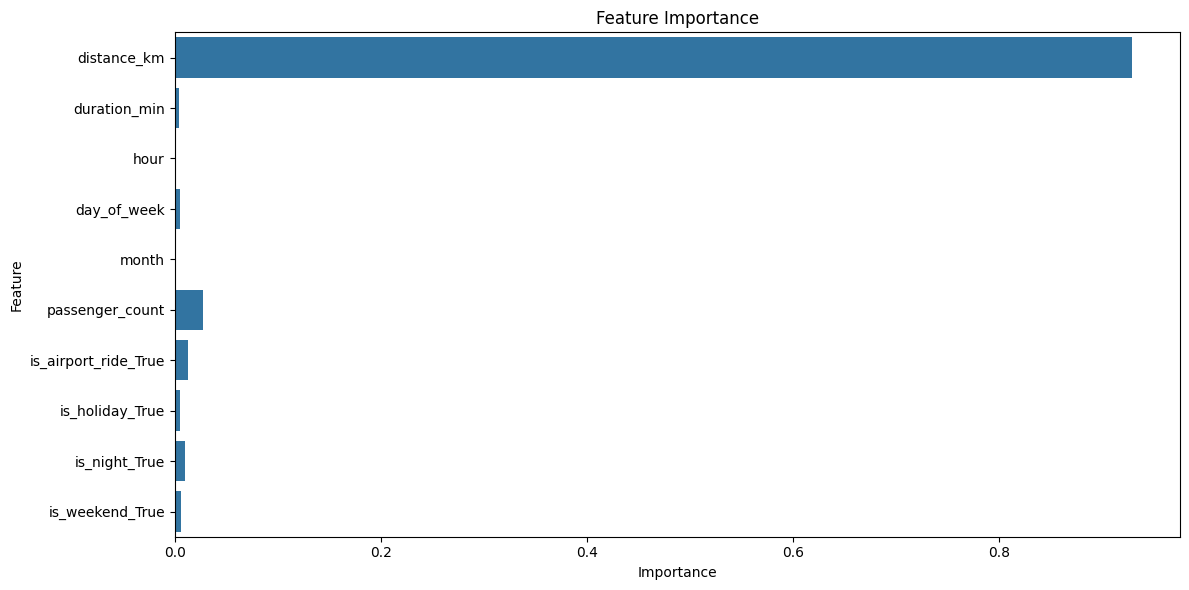

In [63]:
# Retrieve feature names after transformation
feature_names = (
    full_pipeline.named_transformers_['num'].get_feature_names_out(num_attribs).tolist() +
    full_pipeline.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_attribs).tolist()
)

# Plot feature importances
importances = best_model.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# 4. Export Trained Model & Preprocessing Pipeline

In [64]:
import joblib

# Save best model
joblib.dump(best_model, "fare_model.pkl")

# Save preprocessing pipeline
joblib.dump(full_pipeline, "fare_preprocessing_pipeline.pkl")

print("Model and pipeline saved successfully.")


Model and pipeline saved successfully.
